In [1]:
### conflits with Deepnote ###

# matplotlib inline plotting
%matplotlib inline
# make inline plotting higher resolution
%config InlineBackend.figure_format = 'svg'

### conflits with Deepnote ###

In [2]:
# imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('dark_background')

## Problem 1

A wide range of stock characteristics have been shown to be related to average returns in
the cross section of stocks. These characteristics include size, value, investment, profitability,
momentum, reversal, among others. Characteristic-sorted portfolios generate a spread in average
returns, but characteristics associated with large average returns are not necessarily associated
with large market betas and the CAPM therefore fails to explain the cross section of average
returns.

Fama and French (2015) suggest a five-factor model that adds investment and profitability
factors to the Fama and French three-factor model, which consists of market, size, and value
factors and until recently has been one of the main benchmark models for estimating expected
returns in empirical asset pricing. Fama and French have in their recent research shown that
their new five-factor model accounts for several anomalies.

The excel file "Cross_sectional_asset pricing" contains data on the five factors in the Fama-French five-factor model as well as excess returns on three portfolio sets: i) 25 portfolios formed
on profitability and investment, ii) 25 portfolios formed on size and long-term reversal, and iii)
25 portfolios formed on size and momentum. The sample covers the period from $1963: \mathrm{m} 7$ to
2020:m8 and all data are obtained from Kenneth French's website.


## Problem 1, a)
Analyze how the CAPM, the Fama-French three-factor model and the Fama-French five-factor model perform in explaining expected returns on the 25 portfolios formed on profitability
and investment:
- Compute the GRS statistic and the corresponding $p$-value for each of the three models.
- To judge the economic size of the alphas, compute the average absolute value of the alphas for
each of the three models. In matlab you use can e.g. mean(abs(alphas)).

In [3]:
factors = pd.read_excel('Data.xlsx', sheet_name='factors', engine='openpyxl')
factors = factors.rename(columns={'Unnamed: 0': 'date'})
factors['date'] = pd.to_datetime(factors['date'], format='%Y%m')
factors = factors.set_index('date', drop=True)

factors.head()

,Mkt-RF,SMB,HML,RMW,CMA
date,,,,,
1963-07-01,-0.39,-0.47,-0.83,0.66,-1.15
1963-08-01,5.07,-0.79,1.67,0.40,-0.40
1963-09-01,-1.57,-0.48,0.18,-0.76,0.24
1963-10-01,2.53,-1.29,-0.10,2.75,-2.24
1963-11-01,-0.85,-0.84,1.71,-0.45,2.22


In [4]:
ret = pd.read_excel('Data.xlsx', sheet_name='profitability_investment', engine='openpyxl')
ret = ret.rename(columns={'Unnamed: 0': 'date'})
ret['date'] = pd.to_datetime(ret['date'], format='%Y%m')
ret = ret.set_index('date', drop=True)

ret.head()

,LoOP LoINV,OP1 INV2,OP1 INV3,OP1 INV4,LoOP HiINV,OP2 INV1,OP2 INV2,OP2 INV3,OP2 INV4,OP2 INV5,...,OP4 INV1,OP4 INV2,OP4 INV3,OP4 INV4,OP4 INV5,HiOP LoINV,OP5 INV2,OP5 INV3,OP5 INV4,HiOP HiINV
date,,,,,,,,,,,,,,,,,,,,,
1963-07-01,-1.1871,-1.0441,-2.0151,0.6560,-2.5425,-1.4644,-1.5974,3.1350,1.6328,-0.1130,...,-3.1910,0.1815,-1.0238,0.2840,-2.7926,2.3794,0.4006,-0.4158,-0.6402,1.2919
1963-08-01,7.4754,5.2482,4.5759,1.2455,6.4935,8.7000,5.5159,2.4806,2.6059,5.3194,...,3.5235,3.6861,6.1383,6.3852,6.4508,5.4090,6.0601,7.1438,4.5741,6.8132
1963-09-01,-1.0392,-0.8898,-1.9844,-2.8742,-3.1144,0.4615,0.0034,-3.4706,-4.0289,-3.0085,...,-0.9835,-2.0798,-2.8052,-3.4563,-0.7742,-5.8557,-3.0517,-2.9164,-0.7514,-0.9931
1963-10-01,2.1550,0.2475,1.9709,-1.0776,0.9655,1.2260,0.5362,-2.3658,2.4361,-2.3430,...,3.8313,-1.2876,1.7085,7.6181,0.8381,2.5226,3.2412,-0.4902,5.1305,12.4601
1963-11-01,-1.2420,-0.7869,3.1543,-4.4049,0.0987,-1.6428,-3.0245,-2.0282,0.5229,-1.3271,...,4.4249,-0.3162,-1.0040,-0.5399,-2.6382,-0.4554,-0.7120,-3.0749,-1.0372,-5.6682


In [5]:
sr = pd.read_excel('Data.xlsx', sheet_name='size_reversal', engine='openpyxl')
sr = sr.rename(columns={'Unnamed: 0': 'date'})
sr['date'] = pd.to_datetime(sr['date'], format='%Y%m')
sr = sr.set_index('date', drop=True)

sr.head()

,SMALL LoPRIOR,ME1 PRIOR2,ME1 PRIOR3,ME1 PRIOR4,SMALL HiPRIOR,ME2 PRIOR1,ME2 PRIOR2,ME2 PRIOR3,ME2 PRIOR4,ME2 PRIOR5,...,ME4 PRIOR1,ME4 PRIOR2,ME4 PRIOR3,ME4 PRIOR4,ME4 PRIOR5,BIG LoPRIOR,ME5 PRIOR2,ME5 PRIOR3,ME5 PRIOR4,BIG HiPRIOR
date,,,,,,,,,,,,,,,,,,,,,
1963-07-01,-1.96,-0.59,0.56,-0.69,0.93,-1.31,-5.06,-0.20,-1.75,0.31,...,-3.50,-2.68,-1.64,-0.37,-1.75,-1.40,0.15,0.85,-0.10,-0.97
1963-08-01,3.65,3.61,1.71,2.27,1.06,6.39,3.97,4.65,5.05,6.27,...,7.08,5.74,4.88,5.25,4.60,6.62,5.15,5.31,4.54,4.98
1963-09-01,-1.46,-2.03,-0.79,-1.03,-2.96,-2.55,-1.76,-0.53,-2.74,-2.45,...,-2.46,-1.24,-2.22,-2.82,-3.35,-0.67,-2.56,-0.96,-3.60,0.28
1963-10-01,1.16,3.10,2.40,0.72,0.00,0.36,3.92,2.41,2.92,3.68,...,3.17,2.05,0.29,0.76,0.47,0.37,2.11,5.19,1.06,2.81
1963-11-01,-0.86,-2.03,-1.42,-0.74,-0.65,-1.03,1.41,-1.28,1.04,-2.71,...,1.79,-0.37,-0.21,-1.47,-0.27,-0.10,-1.77,-3.36,0.38,0.82


In [6]:
smo = pd.read_excel('Data.xlsx', sheet_name='size_momentum', engine='openpyxl')
smo = smo.rename(columns={'Unnamed: 0': 'date'})
smo['date'] = pd.to_datetime(smo['date'], format='%Y%m')
smo = smo.set_index('date', drop=True)

smo.head()

,SMALL LoPRIOR,ME1 PRIOR2,ME1 PRIOR3,ME1 PRIOR4,SMALL HiPRIOR,ME2 PRIOR1,ME2 PRIOR2,ME2 PRIOR3,ME2 PRIOR4,ME2 PRIOR5,...,ME4 PRIOR1,ME4 PRIOR2,ME4 PRIOR3,ME4 PRIOR4,ME4 PRIOR5,BIG LoPRIOR,ME5 PRIOR2,ME5 PRIOR3,ME5 PRIOR4,BIG HiPRIOR
date,,,,,,,,,,,,,,,,,,,,,
1963-07-01,-0.46,-1.43,0.84,-1.06,-0.78,-2.43,-1.70,-2.51,-1.70,-0.33,...,-2.97,-1.41,-1.40,-1.80,-1.67,-1.66,-0.67,0.76,0.09,-0.34
1963-08-01,1.73,1.59,2.60,2.63,5.58,4.01,4.66,3.94,4.07,6.92,...,5.69,4.30,4.72,4.58,7.69,5.67,4.60,5.53,4.06,6.87
1963-09-01,-1.25,-1.24,-0.85,-1.26,0.16,-4.03,-1.20,-0.90,-1.94,-1.09,...,-4.99,-1.88,-2.51,-2.15,-2.47,-2.55,1.24,-1.76,-1.83,-2.89
1963-10-01,-0.95,-0.61,1.24,2.82,2.52,3.40,0.00,1.48,1.77,3.97,...,-0.28,-0.19,0.55,0.42,3.52,2.27,1.31,2.81,0.65,8.22
1963-11-01,-2.35,-1.79,-1.71,-1.96,-2.65,-3.03,-0.75,-1.10,-1.24,-1.30,...,0.85,-0.68,-1.45,-0.16,-0.47,-1.31,1.50,-1.24,-2.43,-0.97


#### GRS statistic

To test calculate the GRS-test statistic, we can use the following (for both single and multifactor models)

$$G R S=\frac{T-N-k}{N}\left(1+\widehat{\boldsymbol{\mu}}_{k}^{\prime} \hat{\Omega}^{-1} \widehat{\boldsymbol{\mu}}_{k}\right)^{-1} \widehat{\boldsymbol{\alpha}}^{\prime} \widehat{\mathbf{\Sigma}}^{-1} \widehat{\boldsymbol{\alpha}} \quad \sim \mathcal{F}(N, T-N-k)$$

In [7]:
def calc_GRS(F, e, a):
    ddof = 0  # Delta degrees of freedom set to 0 to align with MatLab
    k = 0  # number of factors
    N = e.shape[1]  # number of assets 
    T = e.shape[0]  # time of time-series observations
    
    a = np.matrix(a['alpha'].values)  # estimated alphas (1 x N)
    sigma = e.cov(ddof=ddof)  # residual covariance (N x N)
    mu = np.matrix(F.mean().values)  # k x 1 vector of factor means
    
    if len(F.shape) == 1:
        omega = F.var(ddof=ddof)  # 1 x 1 vector of factor variances
        k = 1
    else:
        omega = F.cov(ddof=ddof)  # k x k covariance matix for the k factors
        k = F.shape[1]
    
    # calculating GRS
    GRS = ((T-N-k)/N) * np.dot(np.linalg.inv((1 + mu * np.linalg.inv(omega) * mu.T)), a * np.linalg.inv(sigma) * a.T)
    p_val = 1 - stats.f.cdf(GRS, N, (T-N-k))
    
    return {
        'GRS': GRS.item(),
        'P value': p_val.item(),
        'Avg. absolute alpha': np.mean(np.abs(a))
    }

In [8]:
# Fit CAPM model
model_spec = [
    ['Mkt-RF'],  # CAPM
    ['Mkt-RF', 'SMB', 'HML'],  # FF three factor
    ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']  # FF five factor
]

out = []

for model in model_spec:
    results = pd.DataFrame()
    resids = pd.DataFrame()
    
    for asset in ret:
        X = factors[model]
        X = sm.add_constant(X)
        Y = ret[asset]

        fit = sm.OLS(endog=Y, exog=X).fit(cov_type='HAC', cov_kwds={'maxlags': 1})

        fit.params = fit.params.rename({'const': 'alpha'})
        results = results.append(fit.params, ignore_index=True)

        resids[asset] = fit.resid.values
        
    out.append(calc_GRS(F=factors[model], e=resids, a=results))

model_names = {
    0: 'CAPM',
    1: 'Fama-French 3-factor',
    2: 'Fama-French 5-factor'
}
out = pd.DataFrame(out)
out.index = out.index.map(model_names)
out

,GRS,P value,Avg. absolute alpha
CAPM,2.800605,0.000008,0.159204
Fama-French 3-factor,2.503949,0.000080,0.140613
Fama-French 5-factor,1.413149,0.088044,0.080511


#### Conclusion

Using any significance level, we reject both the CAPM and FF 3-factor model - thus we reject the null of $\alpha_i=0\; \forall i$ (tested jointly). It makes pretty good sense that the Fama-French 5-factor model performs better than the two latter as this includes factors for profitability and investment (which are the portfolios in question here).

We're not able to reject the FF 5-factor model on a 5% significance level. Furthermore the economic size of the alphas are much smaller than for the two latter models.

## Problem 1, b)

Redo the analysis from a ) using the 25 portfolios formed on size and long-term reversal
instead of the profitability and investment sorted portfolios.

In [9]:
# Fit CAPM model
model_spec = [
    ['Mkt-RF'],  # CAPM
    ['Mkt-RF', 'SMB', 'HML'],  # FF three factor
    ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']  # FF five factor
]

out = []

for model in model_spec:
    results = pd.DataFrame()
    resids = pd.DataFrame()
    
    for asset in sr:
        X = factors[model]
        X = sm.add_constant(X)
        Y = sr[asset]

        fit = sm.OLS(endog=Y, exog=X).fit(cov_type='HAC', cov_kwds={'maxlags': 1})

        fit.params = fit.params.rename({'const': 'alpha'})
        results = results.append(fit.params, ignore_index=True)

        resids[asset] = fit.resid.values
        
    out.append(calc_GRS(F=factors[model], e=resids, a=results))
    
model_names = {
    0: 'CAPM',
    1: 'Fama-French 3-factor',
    2: 'Fama-French 5-factor'
}
out = pd.DataFrame(out)
out.index = out.index.map(model_names)
out

,GRS,P value,Avg. absolute alpha
CAPM,2.395502,0.000178,0.190113
Fama-French 3-factor,2.134411,0.001133,0.071250
Fama-French 5-factor,1.681239,0.020589,0.054926


#### Conclusion

All three models are rejected on a 5% significance level when looking at the size and reversal sorted portfolios. We see however that the economic size of the alphas for the FF 3- and 5-factor models are relatively smaller than what was the case in problem a). 

## Problem 1, c)

Redo the analysis from a using the 25 portfolios formed on size and momentum instead of
the profitability and investment sorted portfolios.

In [10]:
# Fit CAPM model
model_spec = [
    ['Mkt-RF'],  # CAPM
    ['Mkt-RF', 'SMB', 'HML'],  # FF three factor
    ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']  # FF five factor
]

out = []

for model in model_spec:
    results = pd.DataFrame()
    resids = pd.DataFrame()
    
    for asset in smo:
        X = factors[model]
        X = sm.add_constant(X)
        Y = smo[asset]

        fit = sm.OLS(endog=Y, exog=X).fit(cov_type='HAC', cov_kwds={'maxlags': 1})

        fit.params = fit.params.rename({'const': 'alpha'})
        results = results.append(fit.params, ignore_index=True)

        resids[asset] = fit.resid.values
        
    out.append(calc_GRS(F=factors[model], e=resids, a=results))
    
model_names = {
    0: 'CAPM',
    1: 'Fama-French 3-factor',
    2: 'Fama-French 5-factor'
}
out = pd.DataFrame(out)
out.index = out.index.map(model_names)
out

,GRS,P value,Avg. absolute alpha
CAPM,4.868232,2.917666e-13,0.302199
Fama-French 3-factor,5.103337,3.885781e-14,0.309712
Fama-French 5-factor,4.428979,1.278888e-11,0.272311


#### Conclusion

The GRS rejects all three models in this case. We also see that the economic size of the alphas is very large in this case.

## Problem 2

Petkova (2006) analyzes an empirical implementation of Merton's intertemporal CAPM
(ICAPM) and provides evidence that it has the ability to explain the size and value effects.
Besides the market factor $(M),$ the model includes as factors the innovations in the log dividend-
price ratio $(dp),$ the spread on the yield curve ($term$), the default spread $(def),$ and the short t-bill rate $(rf),$ where the innovations are derived from a VAR(1) model.

The purpose of this problem is to examine whether we can get similar results as Petkova (2006)
using an updated sample period that covers the period 1963:m7 to 2019:m12. The excel file
"Cross_sectional_asset_pricing" contains data on the five factors in Petkova's (2006) ICAPM
specification as well as excess returns on the 25 portfolios formed on size and book-to-market.


## Problem 2, a)
Estimate the Petkova's (2006) model on the 25 size and value sorted portfolios using the
Fama-MacBeth procedure, where you allow for a free intercept in the estimation. Compute the
Fama-MacBeth $t$-statitics for the intercept and the five factors. Which factors are statistically
significant and how do the results compare with those of Petkova (2006)$?$

In [11]:
sv = pd.read_excel('Data.xlsx', sheet_name='size_value', engine='openpyxl')
sv = sv.rename(columns={'Unnamed: 0': 'date'})
sv['date'] = pd.to_datetime(sv['date'], format='%Y%m')
sv = sv.set_index('date', drop=True)

sv.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
date,,,,,,,,,,,,,,,,,,,,,
1963-07-01,0.8607,-0.4181,0.2863,-0.1603,-1.5912,-2.0771,-0.0801,-1.1145,-2.2344,-1.4589,...,-1.1156,-1.9752,-2.2742,-1.9357,-2.1267,-0.1299,0.1824,0.9857,-0.6990,-1.3726
1963-08-01,3.9870,1.2331,1.0714,2.1201,4.4245,5.3165,4.2691,4.1139,4.1688,7.9829,...,5.1465,4.5114,5.9568,7.3119,5.0969,5.5210,3.9730,4.4987,7.8919,6.1324
1963-09-01,-3.1578,0.4327,-1.3569,-1.8512,-0.6281,-4.3202,-1.7734,-0.9117,-1.4512,-3.1849,...,-2.9593,-2.2839,-2.1641,-3.8523,-2.2643,-1.6421,-1.0420,-1.2552,-0.4605,-3.7663
1963-10-01,0.9985,-0.9391,0.9543,-0.1900,2.0824,0.9016,3.9442,2.0538,1.9112,3.6435,...,-0.7187,0.6157,2.0559,5.0482,0.3213,5.0361,1.4483,-0.5729,2.1250,0.1957
1963-11-01,-3.6451,-4.3055,-1.8669,-1.3248,-1.3154,-4.5261,-2.0234,-0.9764,-0.3702,-0.3832,...,-1.1348,-1.1528,-0.7582,0.8751,3.2688,-1.5261,0.7149,-1.8242,-2.4022,1.0755


In [12]:
fac = pd.read_excel('Data.xlsx', sheet_name='petkova', engine='openpyxl')
fac = fac.rename(columns={'Unnamed: 0': 'date'})
fac['date'] = pd.to_datetime(fac['date'], format='%Y%m')
fac = fac.set_index('date', drop=True)

fac.head()

,M,dp,term,def,rf
date,,,,,
1963-07-01,-0.39,-0.7441,-0.3427,-0.4622,-0.1147
1963-08-01,5.07,-0.5874,-0.2876,-0.4725,0.0385
1963-09-01,-1.57,-1.2694,-0.0256,0.0692,-0.3011
1963-10-01,2.53,-0.5013,-0.0001,-0.4166,0.0352
1963-11-01,-0.85,0.5908,-0.1756,-0.1152,-0.3257


#### Calculations

- From the $N$ time-series regressions, we obtain $\widehat{\beta}_{i}, i=1, \ldots, N .$ This is called first-pass time-series regressions.

- We run the cross-sectional regression for each time period $t=1, \ldots, T$
$$
R_{i}-R_{f}=c+\lambda \widehat{\beta}_{i}+v_{i}, \quad i=1, \ldots, N
$$
$\Rightarrow T$ estimates of regression coefficients $c$ and $\lambda: \widehat{c}_{1}, \ldots, \widehat{c}_{T}$ and $\widehat{\lambda}_{1}, \ldots, \widehat{\lambda}_{T}$

In [13]:
# First-pass time-series regressions
resids = pd.DataFrame()
results = pd.DataFrame()

for asset in sv.columns:
    Y = sv[asset]
    X = fac
    X = sm.add_constant(X)
    
    fit = sm.OLS(endog=Y, exog=X).fit(cov_type='HAC', cov_kwds={'maxlags': 1})
    
    results = results.append(fit.params, ignore_index=True)  # save betas
    resids = resids.append(fit.resid, ignore_index=True)


results.index = sv.columns
results = results.drop(columns='const')

resids.index = sv.columns
resids = resids.transpose()

In [14]:
# Second-stage regressions
lambda_alpha_t = pd.DataFrame()


for t in range(fac.shape[0]):
    X = results
    X = sm.add_constant(X)
    
    Y = sv.iloc[t]
    
    fit = sm.OLS(endog=Y, exog=X).fit(cov_type='HAC', cov_kwds={'maxlags': 1})
    
    lambda_alpha_t = lambda_alpha_t.append(fit.params, ignore_index=True)

lambda_alpha_t = lambda_alpha_t.rename(columns={'const': 'c'})

#### Testing the CAPM using Fama-MacBeth regressions

- Mean, variance and standard errors of these estimates are then estimated as:
$$
\begin{array}{l}
\overline{\widehat{c}}=\frac{1}{T} \sum_{t=1}^{T} \widehat{c}_{t}, \quad \widehat{\sigma}_{\widehat{c}}^{2}=\frac{1}{T-1} \sum_{t=1}^{T}\left(\widehat{c}_{t}-\overline{\bar{c}}\right)^{2}, \quad \operatorname{se}(\widehat{c})=\widehat{\sigma}_{\widehat{c}} / \sqrt{T} \\
\bar{\lambda}=\frac{1}{T} \sum_{t=1}^{T} \widehat{\lambda}_{t}, \quad \widehat{\sigma}_{\widehat{\lambda}}^{2}=\frac{1}{T-1} \sum_{t=1}^{T}\left(\widehat{\lambda}_{t}-\overline{\hat{\lambda}}\right)^{2}, \quad \operatorname{se}(\widehat{\lambda})=\widehat{\sigma}_{\widehat{\lambda}} / \sqrt{T}
\end{array}
$$
- Assuming homoskedasticity and no serial correlation, the $t$ -ratio for each of the coefficients can be computed as:
$$
\begin{aligned}
t(\widehat{c}) &=\frac{\overline{\hat{c}}}{\operatorname{se}(\widehat{c})} \stackrel{a}{\sim} \mathcal{N}(0,1) \\
t(\widehat{\lambda}) &=\frac{\overline{\hat{\lambda}}}{\operatorname{se}(\widehat{\lambda})} \stackrel{a}{\sim} \mathcal{N}(0,1)
\end{aligned}
$$

In [15]:
def FM_t_stat(T, estimates_vector, hat_bar):
    var_val = 0
    
    for t in range(T):
        var_val += np.power((estimates_vector.iloc[t] - hat_bar), 2)
    
    var_val = var_val * (1 / (T-1))
    
    se_val = np.sqrt(var_val) / np.sqrt(T)
    
    t_stat = hat_bar / se_val
    
    p_val = 1 - stats.norm.cdf(np.abs(t_stat))  # asym. normally distributed
    
    return {
        'Parameter': estimates_vector.name,
        'Estimate': hat_bar,
        'FM t-stat': t_stat,
        'P-value': p_val
    }
    

res = []
for parameter in lambda_alpha_t.columns:
    res.append(FM_t_stat(lambda_alpha_t.shape[0], lambda_alpha_t[parameter], lambda_alpha_t[parameter].mean()))
    
pd.DataFrame(res)

,Parameter,Estimate,FM t-stat,P-value
0,M,-0.325245,-0.907112,0.182174
1,c,0.917058,2.919884,0.001751
2,def,0.088587,0.401734,0.343940
3,dp,0.139498,1.675542,0.046914
4,rf,-0.454570,-2.324309,0.010054
5,term,0.708775,3.407436,0.000328


#### Conclusion

Consistent with Petkova we also find that the yield curve _(term)_ and t-bill rate _(rf)_ are statistically significant when using Fama-MacBeth t-stats.

## Problem 2, b)

Compute the cross-sectional $R^{2}$ and make a plot of mean excess returns against the model
predicted mean excess returns. How does the model fit compare to the findings of Petkova
(2006)$?$


In [16]:
# calculating R2
X = results
X = sm.add_constant(X)

Y = sv.mean()

fit = sm.OLS(endog=Y, exog=X).fit(cov_type='HAC', cov_kwds={'maxlags': 1})
print(f'Cross sectional R2: {fit.rsquared}')

Cross sectional R2: 0.767652569566795


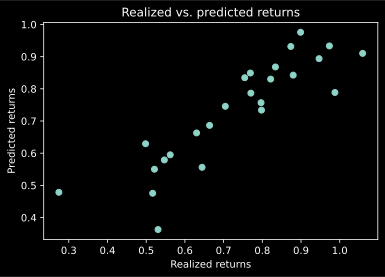

In [17]:
# calculating predicted returns
intercept = lambda_alpha_t['c'].mean()
intercept = np.matrix(intercept)

lambdas = lambda_alpha_t.drop(columns='c').mean().values
lambdas = np.matrix(lambdas)

betas = results.values
betas = np.matrix(betas)

# runnding prediction
pred_returns = intercept + np.dot(betas, lambdas.T)


plt.scatter(sv.mean().values, np.array(pred_returns))
plt.xlabel('Realized returns')
plt.ylabel('Predicted returns')
plt.title('Realized vs. predicted returns')
plt.show()

#### Conclusion
The $R^2$ of the models is $76.77\%$ which is very high. When we inspect the plot we see that perhaps Petkova's model does a good job of explaining the size and value effects in the five-factor model.

## Problem 2, c)
Now impose the theoretical constraint that the intercept in the second-stage cross-sectional
regressions is zero. Re-estimate the model and analyze how this constraint impacts the estimate
on the market factor.

In [18]:
# Second-stage regressions
lambda_alpha_t = pd.DataFrame()


for t in range(fac.shape[0]):
    X = results
    #X = sm.add_constant(X)
    
    Y = sv.iloc[t]
    
    fit = sm.OLS(endog=Y, exog=X).fit(cov_type='HAC', cov_kwds={'maxlags': 1})
    
    lambda_alpha_t = lambda_alpha_t.append(fit.params, ignore_index=True)

lambda_alpha_t = lambda_alpha_t.rename(columns={'const': 'c'})

In [19]:
def FM_t_stat(T, estimates_vector, hat_bar):
    var_val = 0
    
    for t in range(T):
        var_val += np.power((estimates_vector.iloc[t] - hat_bar), 2)
    
    var_val = var_val * (1 / (T-1))
    
    se_val = np.sqrt(var_val) / np.sqrt(T)
    
    t_stat = hat_bar / se_val
    
    p_val = 1 - stats.norm.cdf(np.abs(t_stat))  # asym. normally distributed
    
    return {
        'Parameter': estimates_vector.name,
        'Estimate': hat_bar,
        'FM t-stat': t_stat,
        'P-value': p_val
    }
    

res = []
for parameter in lambda_alpha_t.columns:
    res.append(FM_t_stat(lambda_alpha_t.shape[0], lambda_alpha_t[parameter], lambda_alpha_t[parameter].mean()))
    
pd.DataFrame(res)

,Parameter,Estimate,FM t-stat,P-value
0,M,0.562996,3.296020,4.903245e-04
1,def,0.149497,0.690559,2.449214e-01
2,dp,0.042875,0.609831,2.709870e-01
3,rf,-0.591289,-3.136028,8.562642e-04
4,term,0.938335,4.850474,6.158352e-07


#### Conclusion
When imposing this restriction it is clear that there are some gains in efficiency - as the T-statistics generally increase.